Necessary Modules and Libraries

In [1]:
import pandas as pd``

I plan on merging few datasets as the Datasets are super lopsided

Dataset1


In [2]:
dataset1 = pd.read_csv('spamdetection.csv', encoding='latin-1')

In [3]:
dataset1.columns = ['Text', 'Label']
dataset1

,Text,Label
0,"Oh really? perform, write a paper, go to a mov...",ham
1,"a seller, we would want to inform guests that ...",spam
2,U were outbid by simonwatson5120 on the Shinco...,spam
3,K then 2marrow are you coming to class.,ham
4,Can you let me know details of fri when u find...,ham
...,...,...
6140,Ok lor...,ham
6141,Haha... can... But i'm having dinner with my c...,ham
6142,the information on [ service name ] has recent...,spam
6143,U dun say so early hor... U c already then say...,ham


Dataset2 

In [4]:
dataset2 = pd.read_csv('spamdetection2.csv', encoding='latin-1', on_bad_lines='skip')

In [5]:
dataset2.drop(columns='Unnamed: 0' , inplace=True)
dataset2.columns= ['Text', 'Label']
dataset2

,Text,Label
0,"Confidential :Soma:, Ci@lis, :P:ntermin",spam
1,Â¢Ã ÃÂªÃÃ¼ÃÃ Â¼Â³Â³Â¯ ÃÃÂºÂ¥ÃÂ® ÃÃÂ¸...,spam
2,NaN,spam
3,StOck 0ppurtunities - their sh0Oting,spam
4,CP&L tariff changes (ER01-1807),ham
...,...,...
37887,"frustum XANAAX, TUSSI0NEEX, C1AL1IS, \/11AGRRA...",spam
37888,Get PAYPERVIEW FOR_NOTHING,spam
37889,RE: Nice Mmos wants a date,spam
37890,Get_All Premeium_Movie channels _Free,spam


Merging the both datasets

In [6]:
dataset = pd.concat([dataset1, dataset2], ignore_index=True)

Cleaning the datasets and then towards the preprocessing Part

In [7]:
dataset['Label'].value_counts('normalize=True')

Label
spam              0.449706
ham               0.410733
ham               0.109582
spam              0.029956
{"mode":"full"    0.000023
Name: proportion, dtype: float64

In [8]:
dataset=dataset[dataset['Label'] != '{"mode":"full"']

In [9]:
dataset['Label'] = dataset['Label'].map({'ham ':0, 'spam ':1 , "ham" :0, "spam":1})


In [10]:
dataset['Label'].value_counts(normalize=True)

Label
0.0    0.520327
1.0    0.479673
Name: proportion, dtype: float64

Kinda Done with the Label Filtering 

In [11]:
dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)
dataset.shape

(28796, 2)

Function to work with the cleaning of the Texts

In [12]:
import regex as re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def clean_texts(text) :
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    word_corpus = nltk.word_tokenize(text)
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')

    
    word_corpus = [ps.stem(word.lower()) for word in word_corpus if word not in all_stopwords and len(word)>2]
    return ' '.join(word_corpus)

dataset['Text'] = dataset['Text'].apply(clean_texts)

    

In [13]:
dataset

,Text,Label
0,realli perform write paper movi and home midni...,0.0
1,seller would want inform guest begin april new...,1.0
2,outbid simonwatson shinco dvd plyr bid visit s...,1.0
3,marrow come class,0.0
4,can let know detail fri find co tom fri mentio...,0.0
...,...,...
44030,wonder symanntec game macr media from each lea...,1.0
44031,eol averag deal count trader product,0.0
44032,frustum xanaax tussi neex agrra amb pex from s...,1.0
44034,nice mmo want date,1.0


Removing the Stemmed Portion which causes the texts removal and also cause we removed all <br>
words having length less than 2 so 

In [14]:
dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)
dataset.shape

(23529, 2)

Lets Walk through Some EDA

In [15]:
spam_corpus = dataset[dataset['Label'] == 1]['Text']
ham_corpus = dataset[dataset['Label'] == 0]['Text']

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


spam_woc  = WordCloud(width=500, height=500, min_font_size=10, background_color='white').generate(' '.join(list(spam_corpus)))
ham_woc  = WordCloud(width=500, height=500, min_font_size=10, background_color='white').generate(' '.join(list(ham_corpus)))

### Spam Word Cloud

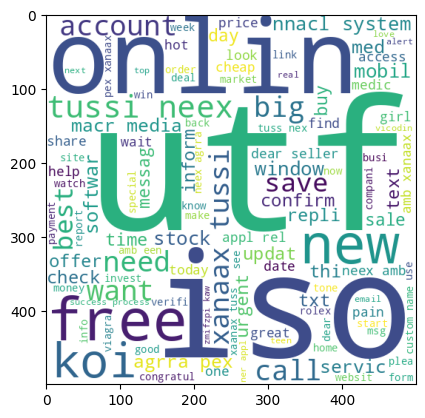

In [17]:
plt.imshow(spam_woc)

### ham Word Cloud

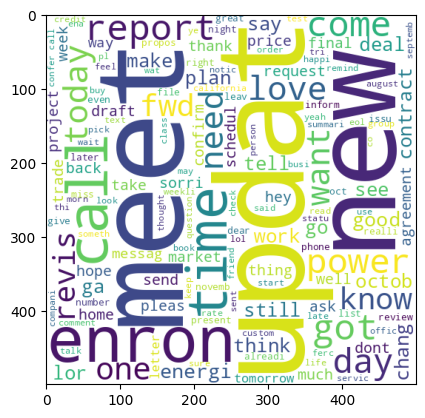

In [18]:
plt.imshow(ham_woc)

character Counts in Spam texts

In [19]:
spam_corpus=spam_corpus.to_frame()
spam_corpus['len']=spam_corpus['Text'].apply(len)

Word Counts In Spam texts 

In [20]:
spam_corpus['word_len'] = spam_corpus['Text'].apply(lambda x: len(nltk.word_tokenize(x)))
spam_corpus

,Text,len,word_len
1,seller would want inform guest begin april new...,154,24
2,outbid simonwatson shinco dvd plyr bid visit s...,85,15
5,kick new season wk free goal news mobil txt cl...,59,12
12,valentin day special win quiz take partner tri...,77,13
13,xma offer latest motorola sonyericsson nokia f...,110,17
...,...,...,...
44029,more money than you can spend,29,6
44030,wonder symanntec game macr media from each lea...,57,10
44032,frustum xanaax tussi neex agrra amb pex from s...,65,11
44034,nice mmo want date,18,4


Wordlength On spam texts

In [21]:
spam_corpus['word_len'].describe()

count    8963.000000
mean        5.576146
std         4.936721
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        43.000000
Name: word_len, dtype: float64

CharacterLength on Spam texts

In [22]:
spam_corpus['len'].describe()

count    8963.000000
mean       34.202499
std        31.015124
min         0.000000
25%        14.000000
50%        24.000000
75%        44.000000
max       306.000000
Name: len, dtype: float64

/tmp/ipykernel_36138/3196119029.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(spam_counts , palette='rocket');


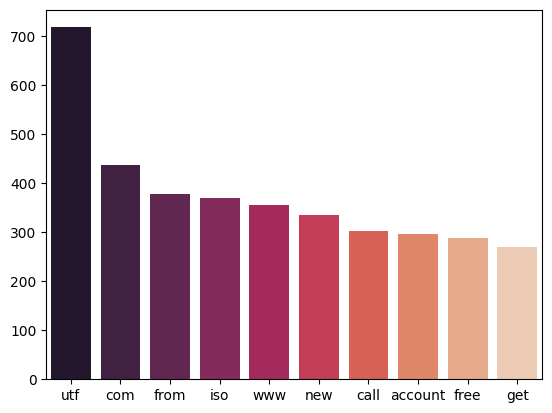

In [23]:
from collections import Counter
import seaborn as sns
# Counter(" ".join(spam_corpus['Text'])).most_common(10)
# "".join(list(nltk.word_tokenize(spam_corpus['Text'])))
# " ".join(spam_corpus['Text'])
spam_counts = dict(Counter(nltk.word_tokenize(" ".join(spam_corpus['Text']))).most_common(10))
# spam_counts
sns.barplot(spam_counts , palette='rocket');


In [24]:
ham_corpus

0        realli perform write paper movi and home midni...
3                                        marrow come class
4        can let know detail fri find co tom fri mentio...
6                    but tell quit long co finish film yet
7        hey babe sorri get sooner gari come fix caus t...
                               ...                        
43954             wmic rto seam report rto schedul timelin
43967                         redeploy opportun minut time
43997                                       polici present
44002                   futur fuel sale ecoelectrica enron
44006                              longview bid confidenti
Name: Text, Length: 14566, dtype: object

Word Count In the Ham Texts 

In [25]:
ham_corpus=ham_corpus.to_frame()
ham_corpus['word_len']=ham_corpus['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

Character Count in the Ham Texts

In [26]:
ham_corpus['len'] = ham_corpus['Text'].apply(lambda x: len(x))


/tmp/ipykernel_36138/1358950907.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ham_counts , palette='rocket');


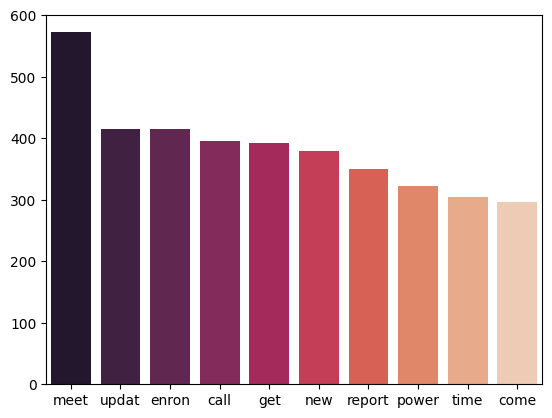

In [27]:

ham_counts = dict(Counter(nltk.word_tokenize(" ".join(ham_corpus['Text']))).most_common(10))
sns.barplot(ham_counts , palette='rocket');

<Axes: xlabel='Label', ylabel='Text'>

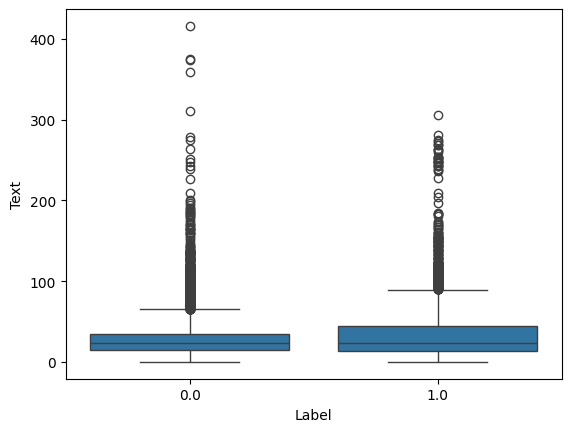

In [28]:
import seaborn as sns

sns.boxplot(x=dataset['Label'], y=dataset['Text'].apply(len))

Word Counts Average In Ham texts 

In [29]:
ham_corpus.apply(len).mean()

np.float64(14566.0)

TFIDF Vectorisation

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
vectoriser = TfidfVectorizer(ngram_range=(1,2) , max_features=20000 )


In [31]:
train_X , test_X , train_y , test_y = train_test_split(dataset['Text'], dataset['Label'], test_size=0.2, random_state=42, stratify=dataset['Label'])

In [32]:
train_X_vectorised = vectoriser.fit_transform(train_X)
test_X_vectorised = vectoriser.transform(test_X)

In [33]:
test_X_vectorised.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Cross Validation

In [54]:
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB , BernoulliNB , CategoricalNB
linear_model = LogisticRegression(n_jobs=-1)
MNB_model = MultinomialNB()
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'f1_macro': 'f1_macro'
}

lm_score =cross_validate(linear_model, train_X_vectorised, train_y, cv=5, scoring=scoring)
Mn_score = cross_validate(MNB_model, train_X_vectorised, train_y, cv=5, scoring=scoring)

In [55]:
pd.DataFrame(lm_score)

,fit_time,score_time,test_accuracy,test_precision_macro,test_f1_macro
0,0.054481,0.006183,0.842231,0.863222,0.820688
1,0.053405,0.007154,0.839044,0.859482,0.816989
2,0.053422,0.006663,0.840106,0.857044,0.819247
3,0.053654,0.006860,0.830499,0.848983,0.807220
4,0.053457,0.006898,0.844846,0.863481,0.824485


In [56]:
pd.DataFrame(Mn_score)

,fit_time,score_time,test_accuracy,test_precision_macro,test_f1_macro
0,0.004361,0.007072,0.850199,0.882627,0.827606
1,0.006489,0.009611,0.838247,0.869862,0.813143
2,0.005990,0.009276,0.847012,0.875100,0.824708
3,0.005760,0.008031,0.839798,0.873716,0.814543
4,0.004204,0.009028,0.848565,0.876472,0.826662


Concluding with the Use of the MULTINOMIAL NAIV BAYES 

In [57]:
MNB_model.fit(train_X_vectorised, train_y)


MultinomialNB()

In [58]:
predict = MNB_model.predict(test_X_vectorised)

In [59]:
accuracy_score(test_y, predict)

0.8376540586485338

In [60]:
precision_score(test_y, predict)

0.942390369733448

<Axes: >

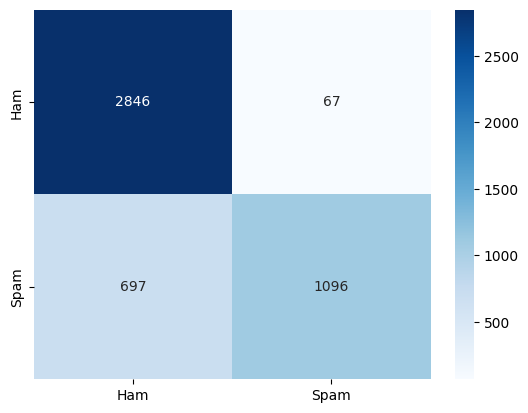

In [61]:
Cf_matrix = confusion_matrix(test_y, predict)
sns.heatmap(Cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])

Packing Up the Models and the Vectorisers 

In [62]:
import joblib
joblib.dump(MNB_model, 'spam_model.pkl')
joblib.dump(vectoriser, 'vectoriser.pkl')

['vectoriser.pkl']